In [ ]:

import pandas as pd
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import CoherenceModel
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re, nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# Load the dataset
data = pd.read_csv("/content/Tweets.csv")  # Replace "your_dataset.csv" with the path to your dataset

# Preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    # Remove stopwords, punctuation, and single-character tokens
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

# Apply preprocessing to the 'text' column
data['processed_text'] = data['text'].apply(preprocess_text)

# Create Dictionary
dictionary = corpora.Dictionary(data['processed_text'])

# Create Corpus
corpus = [dictionary.doc2bow(text) for text in data['processed_text']]

# Build LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=42)

# Print the topics
print("Topics:")
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

# Function to get the dominant topic for each document
def get_dominant_topic(ldamodel, corpus):
    dominant_topics = []
    for doc in corpus:
        topic_distribution = ldamodel.get_document_topics(doc)
        dominant_topic = sorted(topic_distribution, key=lambda x: x[1], reverse=True)[0]
        dominant_topics.append(dominant_topic[0])
    return dominant_topics

# Assign dominant topics to each document
data['dominant_topic'] = get_dominant_topic(lda_model, corpus)

# Analyze topics by tweet_coord and user_timezone
topic_timezone = data.groupby(['dominant_topic', 'tweet_coord', 'user_timezone']).size().reset_index(name='count')
print("Topic distribution by tweet_coord and user_timezone:")
print(topic_timezone)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


Topics:
Topic: 0 
Words: 0.086*"usairways" + 0.040*"americanair" + 0.033*"flight" + 0.018*"jetblue" + 0.014*"get" + 0.011*"http" + 0.011*"plane" + 0.011*"u" + 0.008*"need" + 0.006*"seat"
Topic: 1 
Words: 0.050*"jetblue" + 0.026*"thank" + 0.011*"southwestair" + 0.010*"get" + 0.010*"flight" + 0.009*"thanks" + 0.008*"http" + 0.006*"catering" + 0.006*"help" + 0.006*"mile"
Topic: 2 
Words: 0.053*"americanair" + 0.014*"gate" + 0.013*"flight" + 0.010*"thanks" + 0.009*"time" + 0.009*"agent" + 0.008*"call" + 0.008*"right" + 0.008*"amp" + 0.007*"american"
Topic: 3 
Words: 0.077*"americanair" + 0.039*"flight" + 0.024*"cancelled" + 0.017*"service" + 0.016*"hour" + 0.016*"customer" + 0.014*"call" + 0.013*"get" + 0.013*"help" + 0.012*"flightled"
Topic: 4 
Words: 0.068*"americanair" + 0.031*"flight" + 0.016*"southwestair" + 0.012*"aa" + 0.010*"minute" + 0.009*"thanks" + 0.008*"get" + 0.008*"hour" + 0.007*"http" + 0.007*"change"
Topic distribution by tweet_coord and user_timezone:
     dominant_topic 

<ipython-input-9-2a9361cf9b65>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='dominant_topic', data=data, palette='viridis')


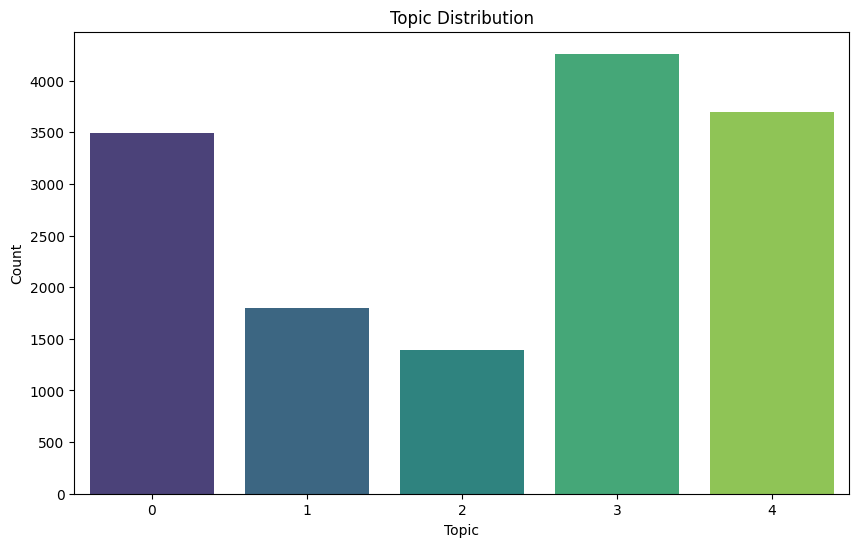

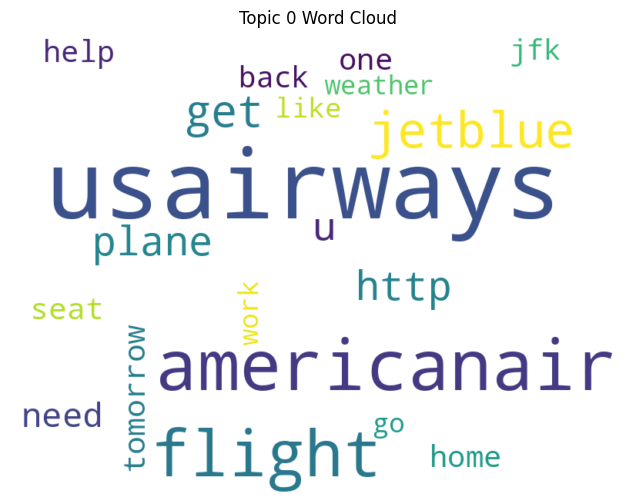

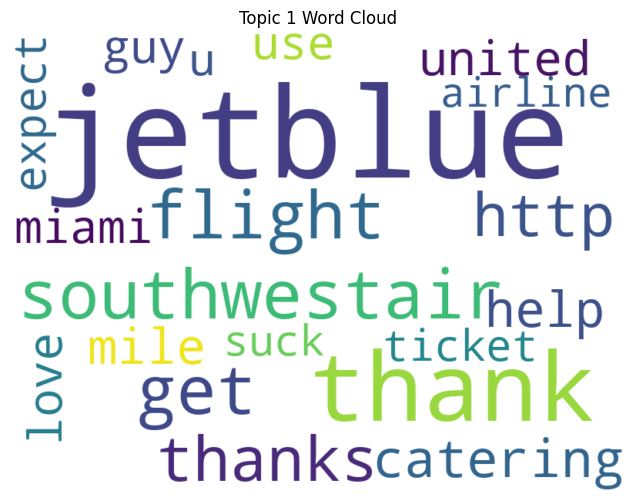

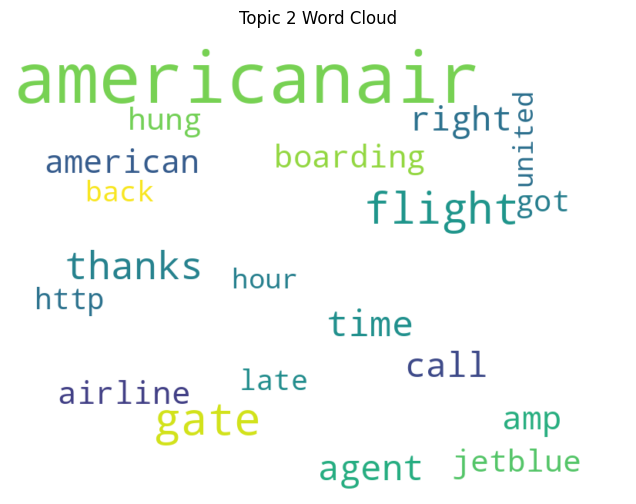

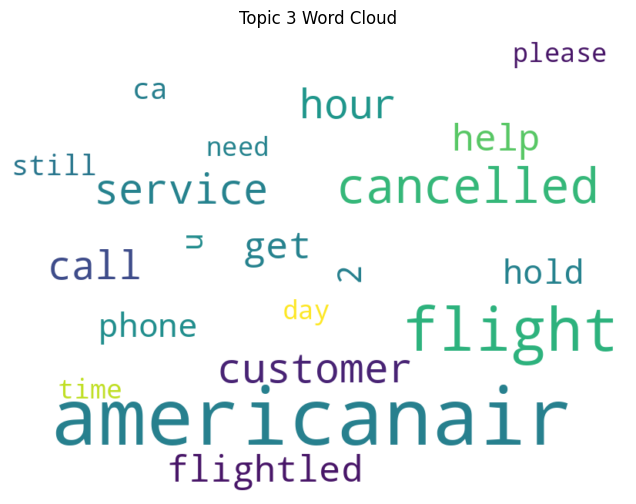

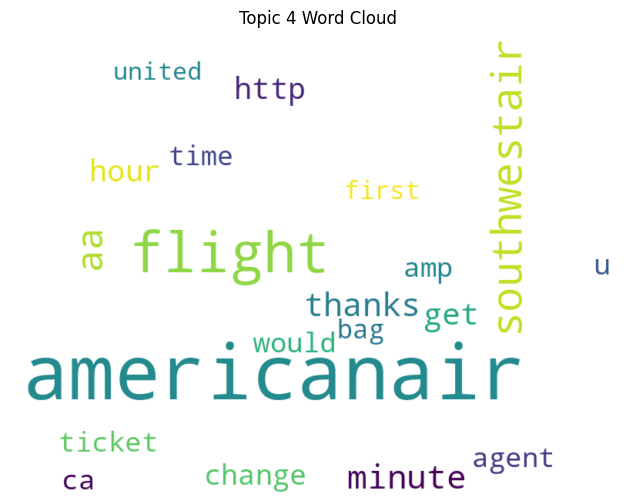

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Topic Distribution Bar Chart
plt.figure(figsize=(10, 6))
sns.countplot(x='dominant_topic', data=data, palette='viridis')
plt.title('Topic Distribution')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()


# Word Clouds for Each Topic
for topic_idx in range(lda_model.num_topics):
    plt.figure(figsize=(8, 6))
    topic_words = dict(lda_model.show_topic(topic_idx, topn=20))
    wordcloud = WordCloud(width=800, height=600, background_color='white').generate_from_frequencies(topic_words)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {topic_idx} Word Cloud')
    plt.axis('off')
    plt.show()



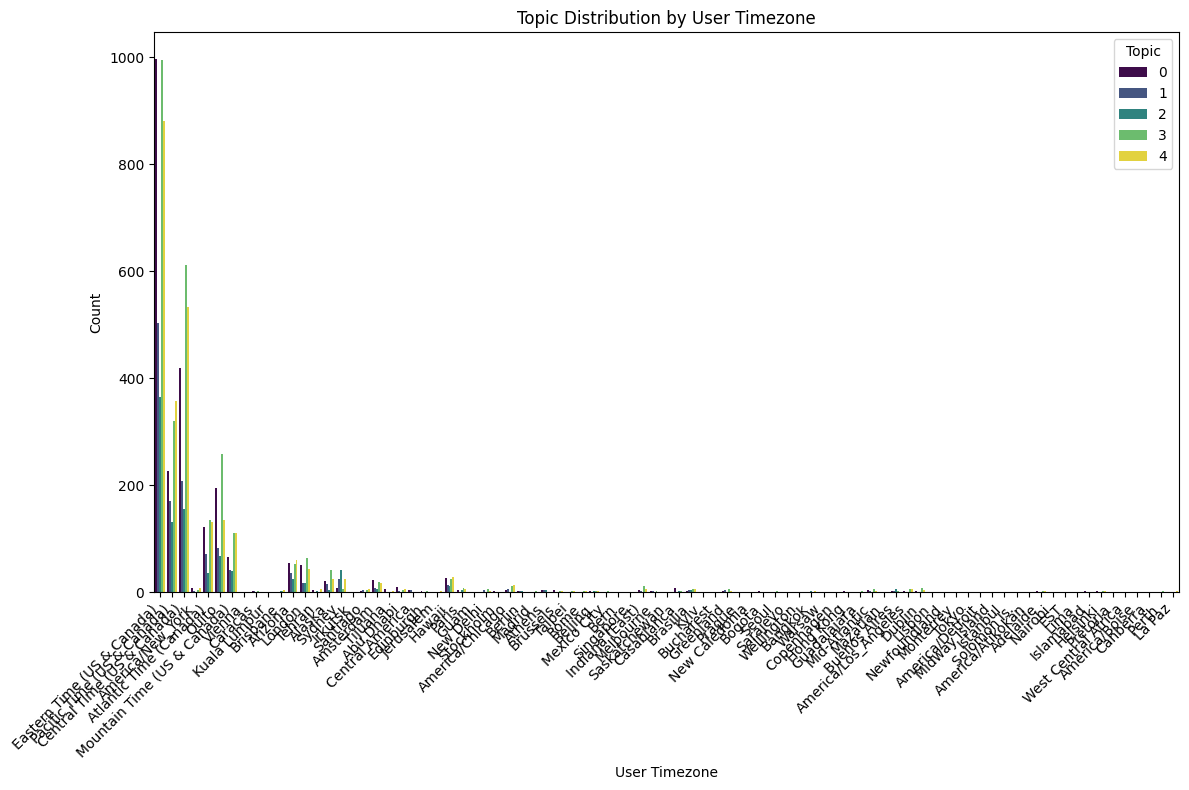

In [ ]:
# Topic Distribution by User Timezone
plt.figure(figsize=(12, 8))
sns.countplot(x='user_timezone', hue='dominant_topic', data=data, palette='viridis')
plt.title('Topic Distribution by User Timezone')
plt.xlabel('User Timezone')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Topic')
plt.tight_layout()
plt.show()


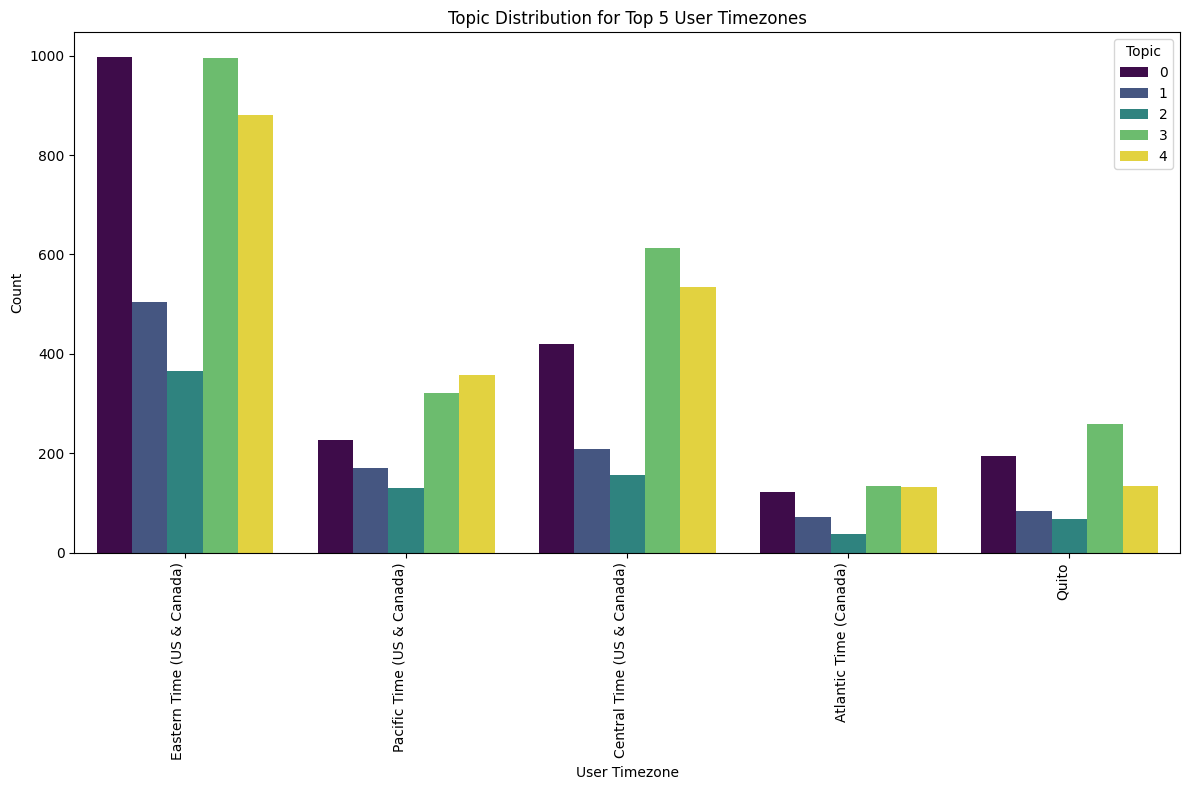

In [ ]:
# Get the top 5 most common user timezones
top5_timezones = data['user_timezone'].value_counts().head(5).index

# Filter the data for the top 5 timezones
data_top5_timezones = data[data['user_timezone'].isin(top5_timezones)]

# Plot the topic distribution for the top 5 timezones
plt.figure(figsize=(12, 8))
sns.countplot(x='user_timezone', hue='dominant_topic', data=data_top5_timezones, palette='viridis')
plt.title('Topic Distribution for Top 5 User Timezones')
plt.xlabel('User Timezone')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Topic')
plt.tight_layout()
plt.show()
